In [ ]:
!pip install langchain qdrant_client openai tiktoken

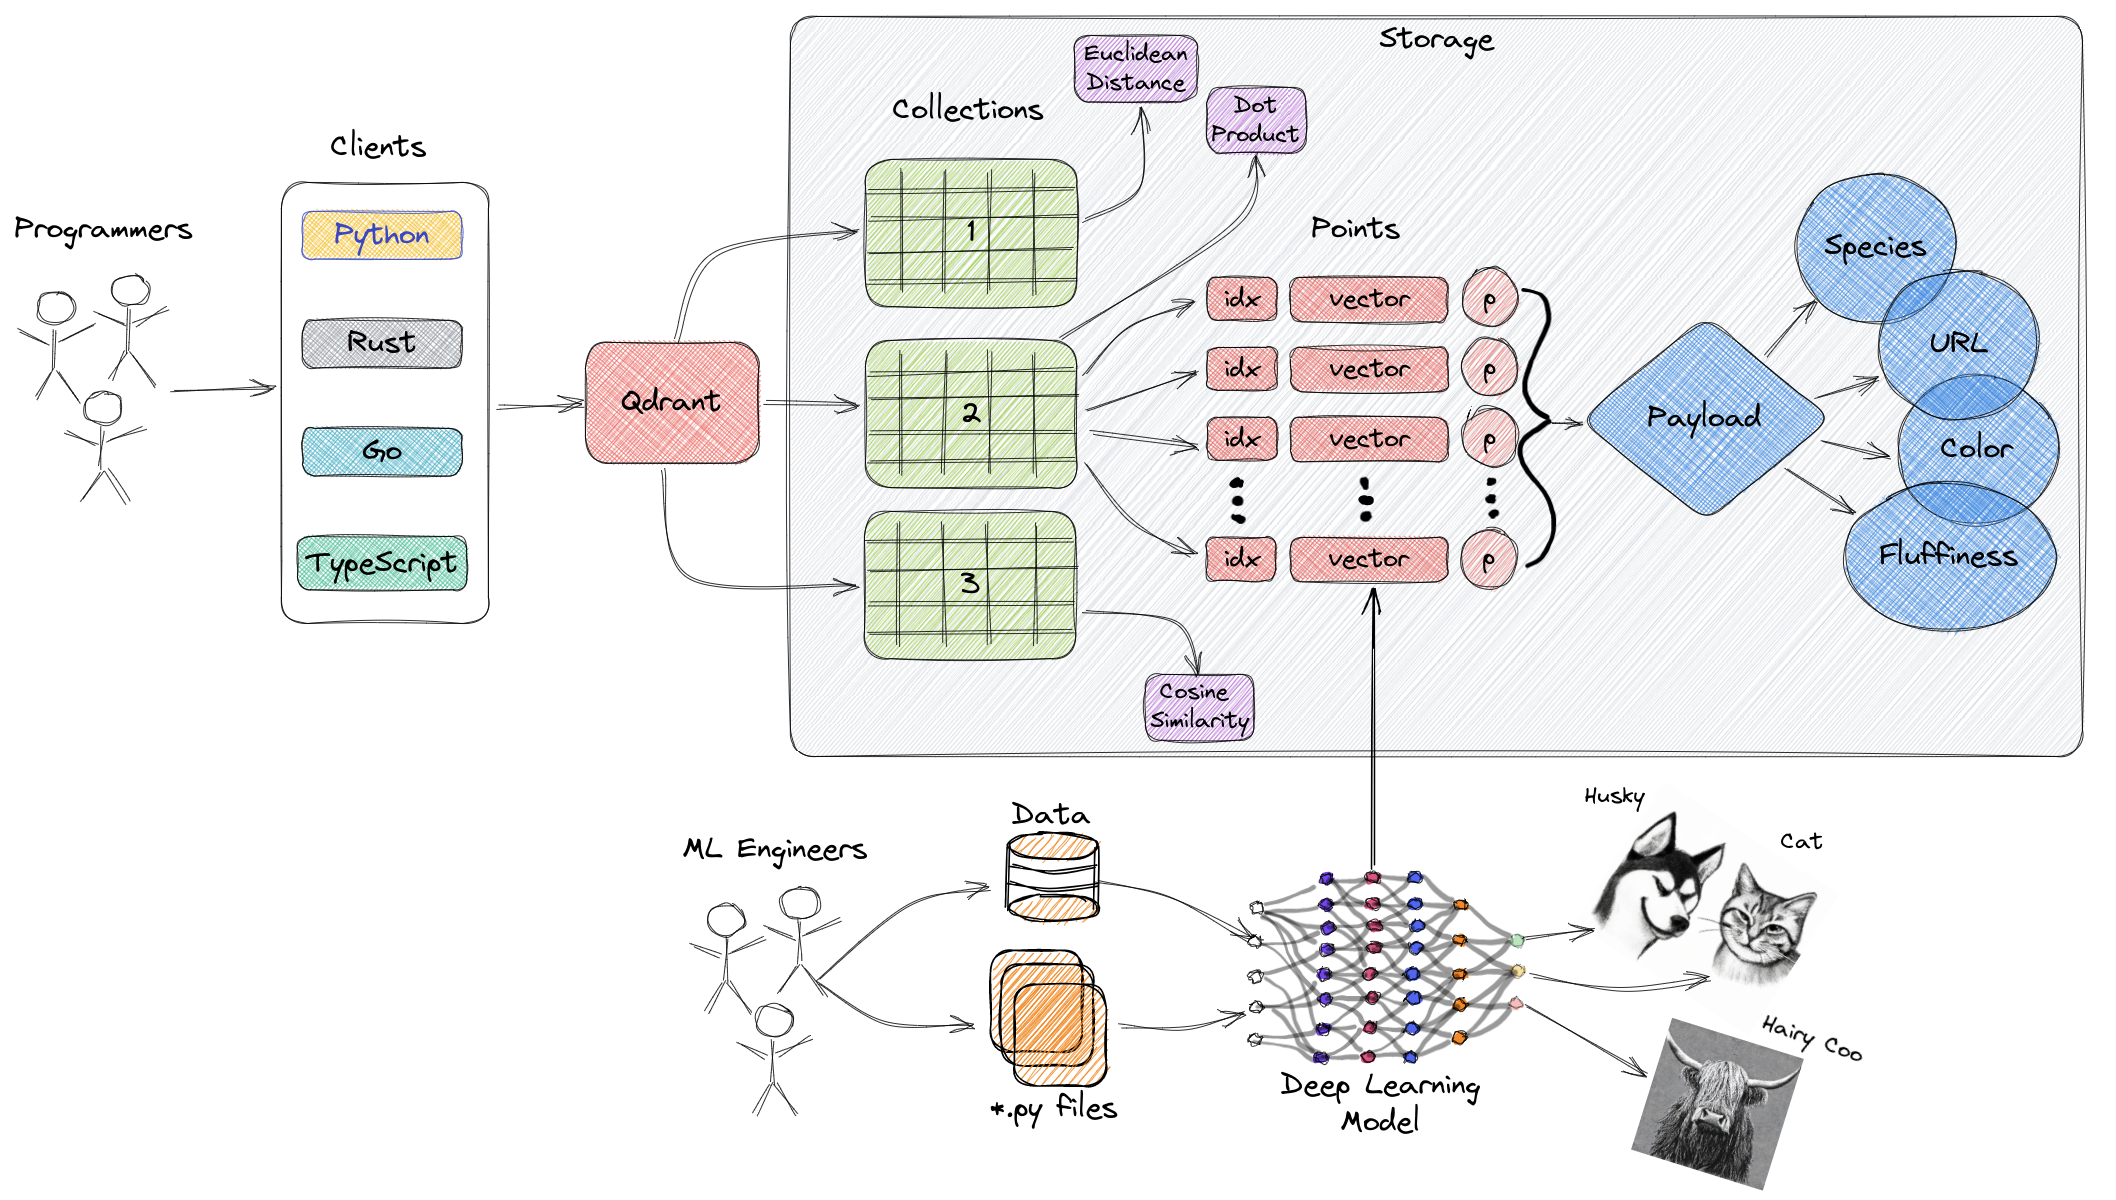

In [ ]:
from langchain.vectorstores import Qdrant
from langchain.embeddings.openai import OpenAIEmbeddings
import qdrant_client
import os

In [ ]:
# create your client

os.environ['QDRANT_HOST'] = 'https://196edc96-bae0-44e0-b5b4-b4363cf594df.us-east4-0.gcp.cloud.qdrant.io:6333'
os.environ['QDRANT_API_KEY'] = "xuTl47t-kS48Lxyj65Lymqkk6Hcl6nd44N-38UqcvrvSkqP9JnE-Ow"

#client object

client = qdrant_client.QdrantClient(
        os.getenv("QDRANT_HOST"),
        api_key=os.getenv("QDRANT_API_KEY")
    )

Collection Docu : https://qdrant.tech/documentation/concepts/collections/

In [ ]:
# create collection

os.environ['QDRANT_COLLECTION_NAME'] = "my-collection"  #can name anything unique

collection_config = qdrant_client.http.models.VectorParams(
        size=768, # 768 for instructor-xl, 1536 for OpenAI
        distance=qdrant_client.http.models.Distance.COSINE
    )

client.recreate_collection(
    collection_name=os.getenv("QDRANT_COLLECTION"),
    vectors_config=collection_config
)

True

In [ ]:
!pip install sentence-transformers

langchain Integration Doc : https://qdrant.tech/documentation/integrations/langchain/

In [ ]:
# create your vector store

'''
for openai embeddings
os.environ['OPENAI_API_KEY'] =
embeddings = OpenAIEmbeddings()
'''

#huggingface embeddings
from langchain.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-mpnet-base-v2"
)

vectorstore = Qdrant(
        client=client,
        collection_name=os.getenv("QDRANT_COLLECTION_NAME"),
        embeddings=embeddings
    )

In [ ]:
# add documents to your vector database

from langchain.text_splitter import CharacterTextSplitter

def get_chunks(text):
    text_splitter = CharacterTextSplitter(
        separator="\n",
        chunk_size=800,
        chunk_overlap=200,
        length_function=len
    )
    chunks = text_splitter.split_text(text)
    return chunks

with open("lifeofppi.text") as f:
    raw_text = f.read()

texts = get_chunks(raw_text)

print(texts)

['Summary of "Life of Pi"\n"Life of Pi" by Yann Martel is a novel that tells the extraordinary story of a young Indian boy named Pi Patel, who embarks on a remarkable journey of survival and self-discovery. The novel is structured as a narrative within a narrative, with an older Pi recounting his story to a writer looking for inspiration.\nPart 1: Toronto and the Writer\'s Quest\nThe novel begins with an author\'s note in which the writer describes his search for an inspiring story to write. He is introduced to an elderly man named Francis Adirubasamy, who insists that the writer should meet Pi Patel. Pi is said to have an incredible story that will make the writer believe in God. The writer travels to Canada to meet Pi.\nPart 2: Pondicherry and Pi\'s Early Life', "Part 2: Pondicherry and Pi's Early Life\nPi's narrative begins with his childhood in Pondicherry, India. His father runs a zoo, and Pi is exposed to a wide variety of animals, which fuels his fascination with the animal king

In [ ]:
vectorstore.add_texts(texts)

['f373e14421794146bd9137770a2aec30',
 '40a4a4851d7b48aebd9191057179f7ff',
 '4267f7efb1084950b21c3a554ca40865',
 '453a97dec33b454a9ac97f9903ad4730',
 '8bc2fefb579a4ababcbb673ac677d5e8',
 'ec43f91334ef4f77ab98bd0b891c93ef',
 'b32e8ade6e5441f98688bd4f1d842713',
 '88823f2219e249df88a0869e0cc74fc5',
 '3b91bc4e235e49e580e02995649b6aa3',
 'e1bc1e47cb3145f0b1adb88bf1e6e4ad',
 'e93d92ebb5e548c390aa285e7d0d8dea']

RetrievalQA : https://python.langchain.com/docs/use_cases/question_answering/how_to/vector_db_qa

In [ ]:
# plug the vector store to your retrieval chain

from langchain.chains import RetrievalQA
from langchain.llms import OpenAI


qa = RetrievalQA.from_chain_type(
    llm=OpenAI(),
    chain_type="stuff",
    retriever=vectorstore.as_retriever()
    )

In [ ]:
query = "how old was Pi when they leave India?"
response = qa.run(query)

print(response)